# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [ ]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 208 kB 38.8 MB/s 
     |████████████████████████████████| 297 kB 48.6 MB/s 
     |████████████████████████████████| 297 kB 47.4 MB/s 
     |████████████████████████████████| 297 kB 32.2 MB/s 
     |████████████████████████████████| 296 kB 47.2 MB/s 
     |████████████████████████████████| 296 kB 51.4 MB/s 
     |████████████████████████████████| 280 kB 10.0 MB/s 
     |████████████████████████████████| 280 kB 47.1 MB/s 
     |████████████████████████████████| 280 kB 36.6 MB/s 
     |████████████████████████████████| 280 kB 43.1 MB/s 
     |████████████████████████████████| 279 kB 44.1 MB/s 
     |████████████████████████████████| 279 kB 40.6 MB/s 
     |███████████████

In [ ]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [ ]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,181120,181178,181236,181465,181534,181574,181666,181725,181808
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276731,276731,276821,276821,276821,277141,277141,277409,277444,277663
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265927,265937,265943,265952,265964,265968,265971,265975,265985,265993
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43449,43449,43449,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7709,7710,7710,7710,7713,7713,7713,7713,7714,7715
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [ ]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [ ]:
print((confirmed_df.columns[4], deaths_df.columns[4], recoveries_df.columns[4]))

('1/22/20', '1/22/20', '1/22/20')


    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [ ]:
print((confirmed_df.columns[-1], deaths_df.columns[-1], recoveries_df.columns[-1]))

('6/21/22', '6/21/22', '6/21/22')


    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [ ]:
print((confirmed_df["Country/Region"].nunique(), deaths_df["Country/Region"].nunique(), recoveries_df["Country/Region"].nunique()))

(199, 199, 199)


    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [ ]:
print((len(confirmed_df.columns[4:]), len(deaths_df.columns[4:]), len(recoveries_df.columns[4:])))

(882, 882, 882)


    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [ ]:
# Quốc gia bị trùng lặp trong bộ dữ liệu confirmed_df:
confirmed_df[confirmed_df.duplicated(subset=['Country/Region'])==True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2667026,2672176,2679407,2688494,2696819,2704914,2711234,2717292,2725064,2734519
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,74317,74485,74722,74722,74982,75469,75649,75814,76039,76283
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1224031,1228242,1232417,1236839,1241020,1245043,1248002,1251031,1255837,1260631
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,548777,551400,554174,557199,559972,559972,562327,566507,568884,571654
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,172237,172898,173756,174613,175411,176261,176857,177330,178317,179472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,51132,51132,51132,51132,51132,51132,51132,51132,51792,51792
271,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1012,1012,1012,1014,1014,1014,1015,1015,1015,1015
272,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
273,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,6160,6160,6160,6189,6189,6189,6189,6189,6189,6189


In [ ]:
# Quốc gia bị trùng lặp trong bộ dữ liệu deaths_df:
deaths_df[deaths_df.duplicated(subset=['Country/Region'])==True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,3319,3322,3336,3353,3361,3385,3392,3397,3404,3430
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1120,1126,1139,1152,1163,1171,1171,1171,1175,1181
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,476,476,485,490,496,496,496,503,514,518
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,80,81,81,82,84,85,85,85,85,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,129,129,129,129,129,129,129,129,131,131
271,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
272,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,36,36,36,36,36,36,36,36,36,36


In [ ]:
# Quốc gia bị trùng lặp trong bộ dữ liệu recoveries_df:
recoveries_df[recoveries_df.duplicated(subset=['Country/Region'])==True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [ ]:
# Những quốc gia được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố:
confirmed_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [ ]:
# Những quốc gia được lưu trữ số ca Covid theo từng thành phố:
confirmed_df.dropna()["Country/Region"].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [ ]:
# Quốc gia và ngày mà có số ca Covid nhiều nhất:
max = confirmed_df.iloc[:,4:].max()
print(confirmed_df['Country/Region'][confirmed_df[max.idxmax()] == confirmed_df[max.idxmax()].max()].values,'-',max.idxmax(),':',max.max())

['US'] - 6/21/22 : 86452232


    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [ ]:
# Quốc gia có tổng số người mất do Covid là nhiều nhất
max = deaths_df.iloc[:,4:].max()
print(deaths_df['Country/Region'][deaths_df[max.idxmax()] == deaths_df[max.idxmax()].max()].values,':',max.max())

['US'] : 1013975


    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [ ]:
# Tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam:
confirmed = confirmed_df.groupby(['Country/Region']).sum()
deaths = deaths_df.groupby(['Country/Region']).sum()
recoveries = recoveries_df.groupby(['Country/Region']).sum()
print('Tống số ca Covid:',confirmed.loc['Vietnam'][-1])
print('Tống số ca tử vong:',deaths.loc['Vietnam'][-1])
print('Tống số ca hồi phục:',recoveries.loc['Vietnam'][-1])
print('Tống số ca còn Covid:',confirmed.loc['Vietnam'][-1]-deaths.loc['Vietnam'][-1]-recoveries.loc['Vietnam'][-1])

Tống số ca Covid: 10738909.0
Tống số ca tử vong: 43083.0
Tống số ca hồi phục: 0.0
Tống số ca còn Covid: 10695826.0


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [ ]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

for d in dates:
  total_cases.append(confirmed[d].sum())
  total_deaths.append(deaths[d].sum())
  total_recovered.append(recoveries[d].sum())
  total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

In [ ]:
# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  540567752
Total death cases:  6322038
Total recoveries cases:  0
Total active cases:  534245714


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log10



Text(0.5, 0, 'Days since 1/22/2020')

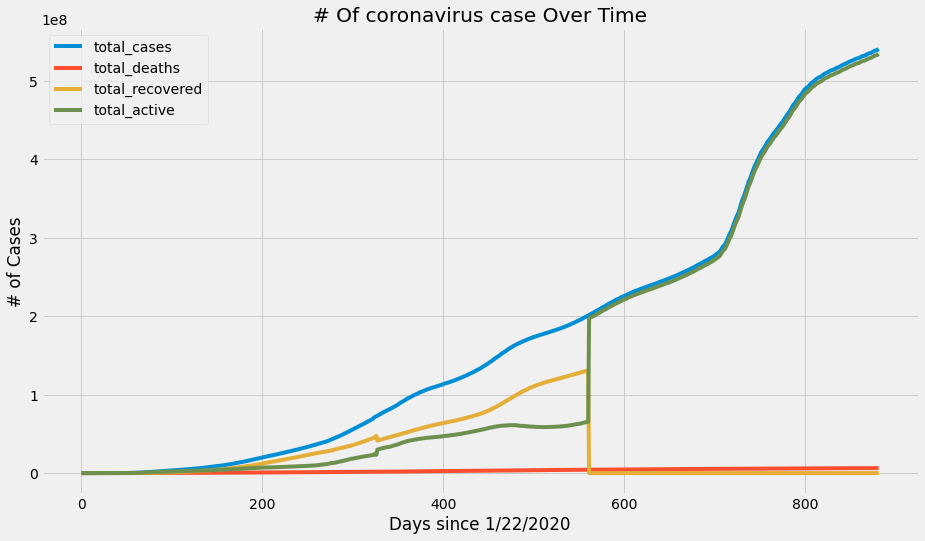

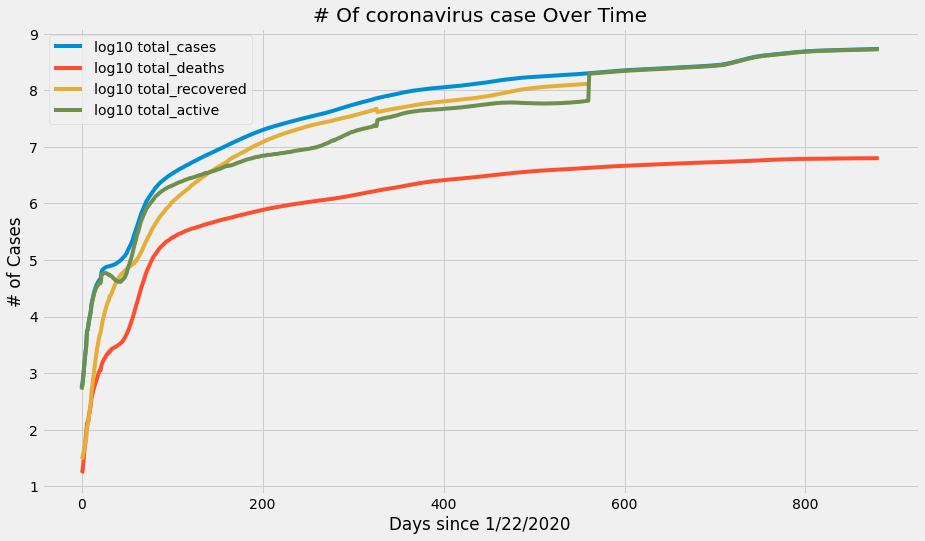

In [ ]:
#Tạo DataFrame tổng số ca
df = pd.DataFrame({'total_cases':total_cases, 'total_deaths':total_deaths, 'total_recovered':total_recovered, 'total_active':total_active})
#Tạo DataFrame log(10) của tổng số ca
log10_df = pd.DataFrame({'log10 total_cases':np.log10(total_cases), 'log10 total_deaths':np.log10(total_deaths), 'log10 total_recovered':np.log10(total_recovered), 'log10 total_active':np.log10(total_active)})
#Vẽ biểu đồ tổng số ca theo ngày
df.plot(kind='line', figsize=(14, 8)) 
plt.title('# Of coronavirus case Over Time')
plt.ylabel('# of Cases')
plt.xlabel('Days since 1/22/2020')
#Vẽ biểu đồ log(10) của tổng số ca theo ngày
log10_df.plot(kind='line', figsize=(14, 8))
plt.title('# Of coronavirus case Over Time')
plt.ylabel('# of Cases')
plt.xlabel('Days since 1/22/2020')

## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

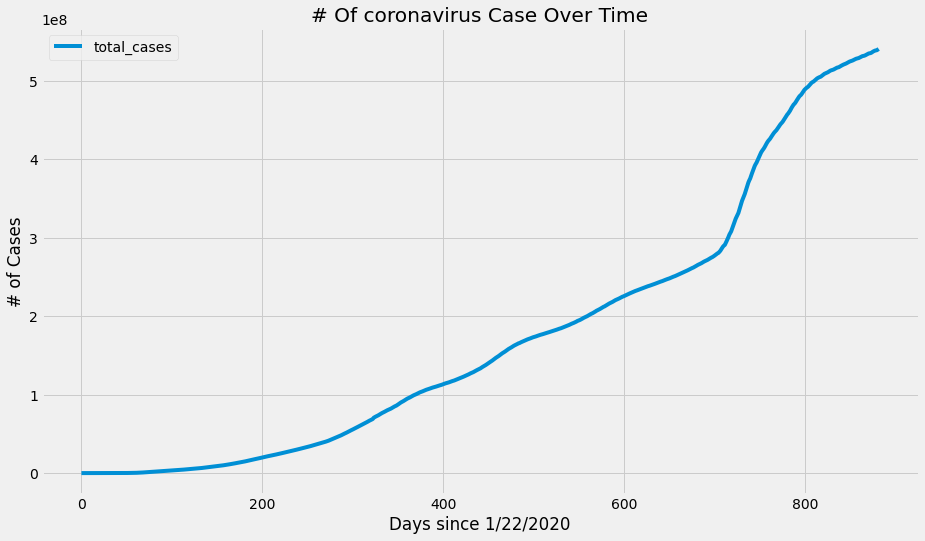

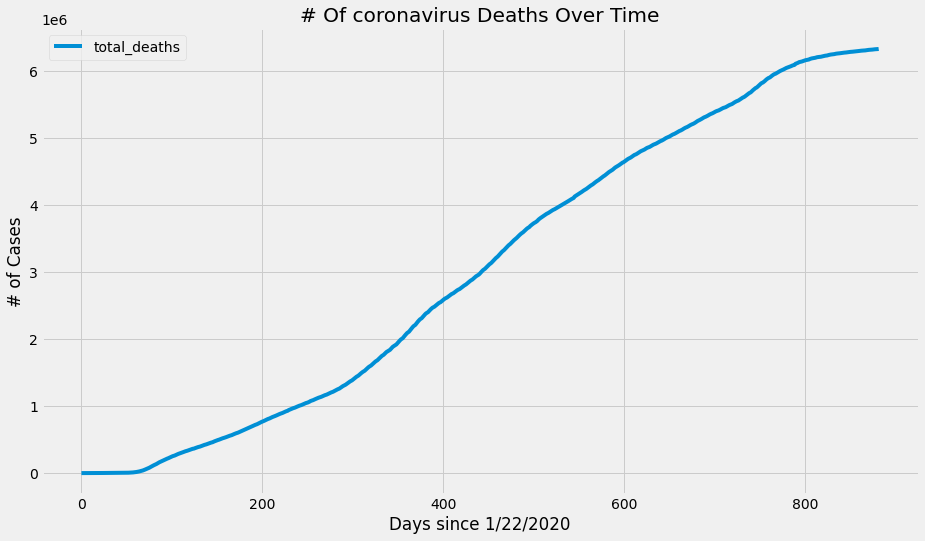

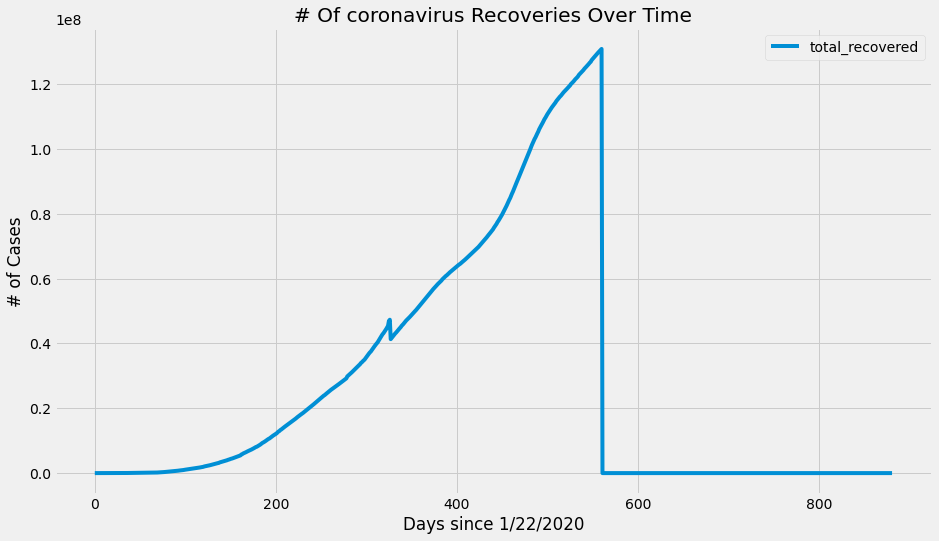

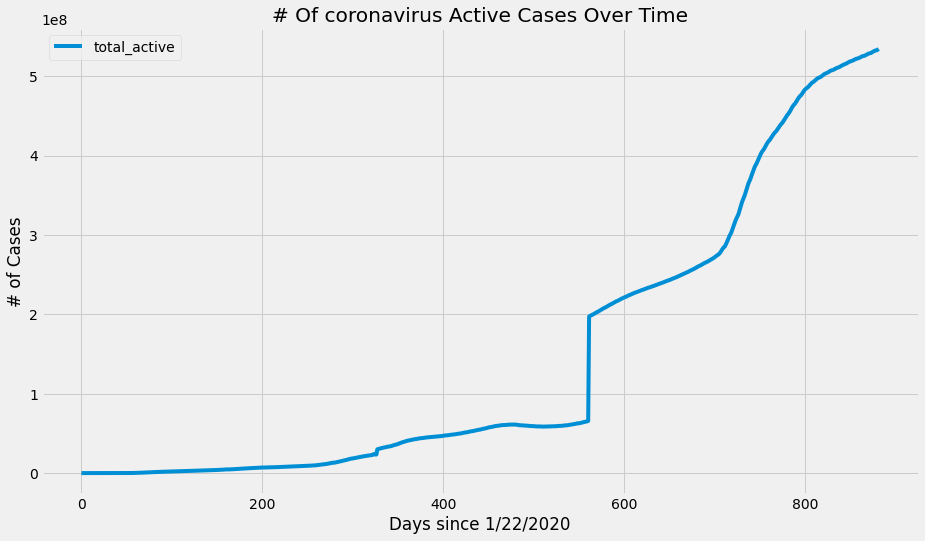

In [ ]:
# Vẽ biểu đồ đường thể hiện tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo đơn vị ngày
for i in range(df.shape[1]):
    df_cases = pd.DataFrame(df.iloc[:,i])
    name = df_cases.columns[0]
    if name == 'total_cases':
        title = '# Of coronavirus Case Over Time'
    elif name == 'total_deaths':
        title = '# Of coronavirus Deaths Over Time'
    elif name == 'total_recovered':
        title = '# Of coronavirus Recoveries Over Time'
    else:
        title = '# Of coronavirus Active Cases Over Time'
    df_cases.plot(kind='line', figsize=(14, 8))
    plt.title(title)
    plt.ylabel('# of Cases')
    plt.xlabel('Days since 1/22/2020')

## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

In [ ]:
#Khai báo list lưu giá trị
increases_cases = []
increases_deaths = []
increases_recovered = []
increases_active = []
#Thêm giá trị đầu tiên cho list là tổng số ca của ngày ghi nhận đầu tiên của bộ dữ liệu
increases_cases.append(total_cases[0])
increases_deaths.append(total_deaths[0])
increases_recovered.append(total_recovered[0])
increases_active.append(total_active[0])
#Tính số lượng gia tăng hàng ngày
for i in range(1,len(adjusted_dates)):
    increases_cases.append(total_cases[i] - total_cases[i - 1])
    increases_deaths.append(total_deaths[i] - total_deaths[i - 1])
    increases_recovered.append(total_recovered[i] - total_recovered[i - 1])
    increases_active.append(total_active[i] - total_active[i - 1])
increases_df = pd.DataFrame({'increases_case':increases_cases, 'increases_death':increases_deaths, 'increases_recovered':increases_recovered, 'increases_active':increases_active})
increases_df    

,increases_case,increases_death,increases_recovered,increases_active
0,557,17,30,510
1,100,1,2,97
2,287,8,7,272
3,493,16,3,474
4,683,14,14,655
...,...,...,...,...
877,604576,1336,0,603240
878,224454,586,0,223868
879,271492,564,0,270928
880,744559,1669,0,742890


## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

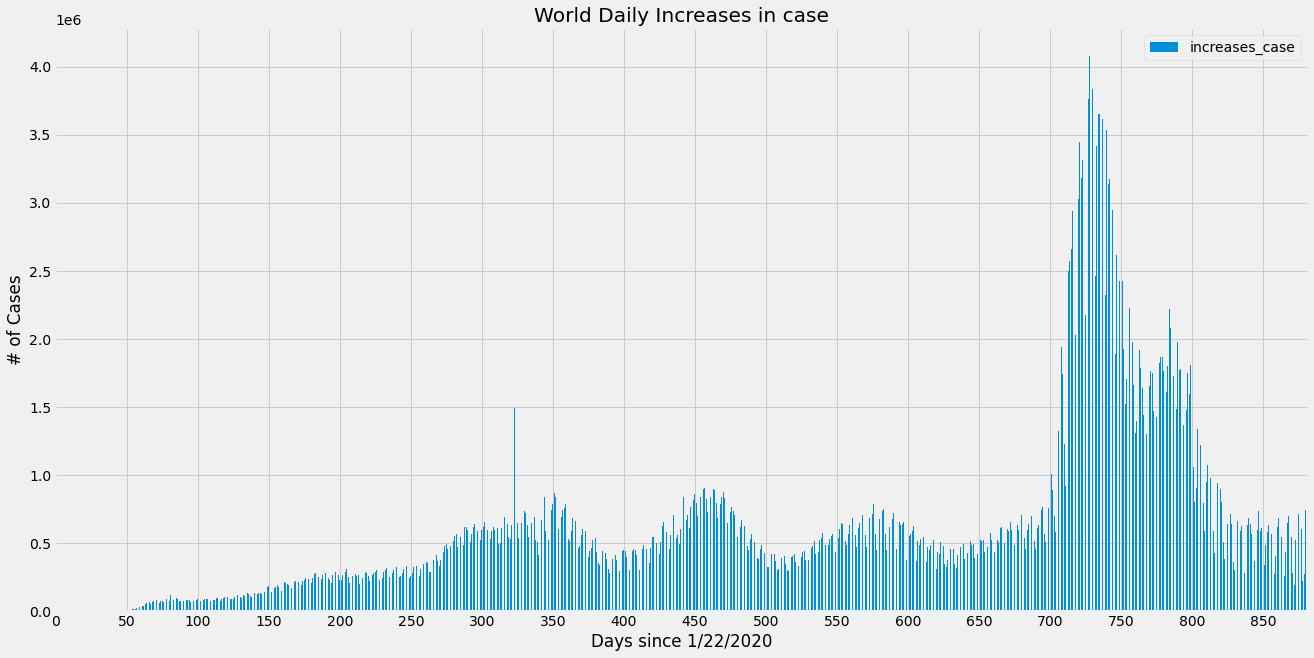

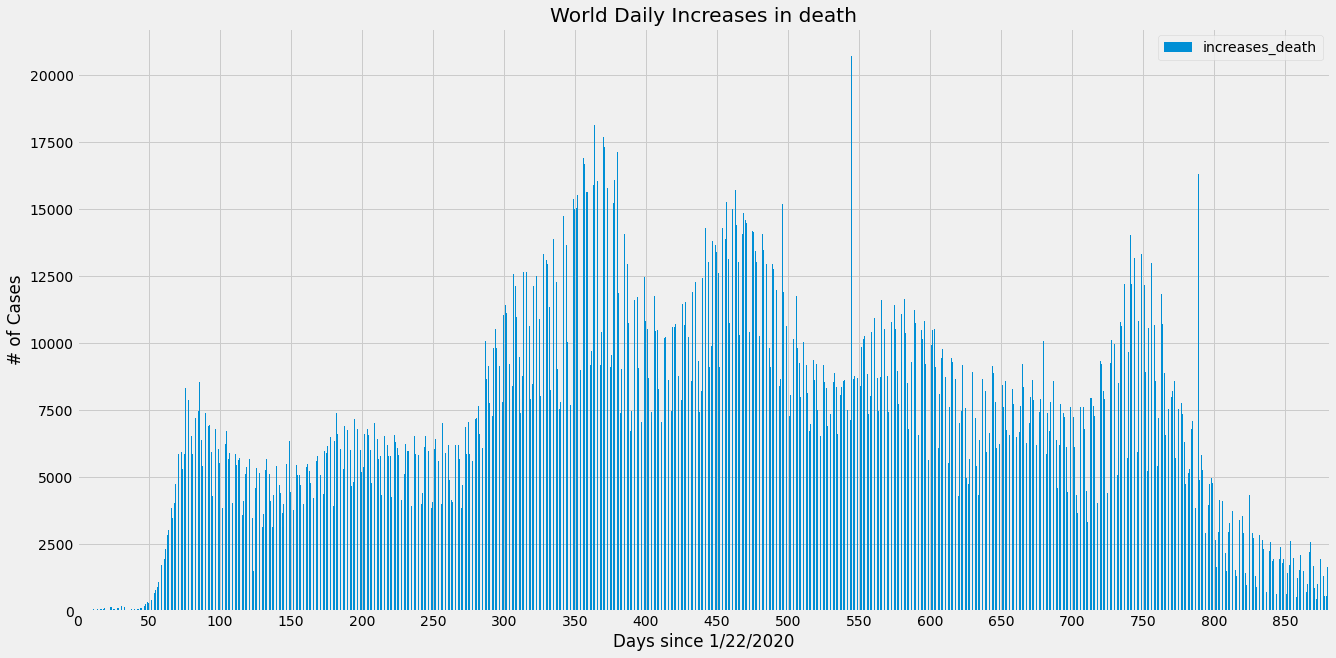

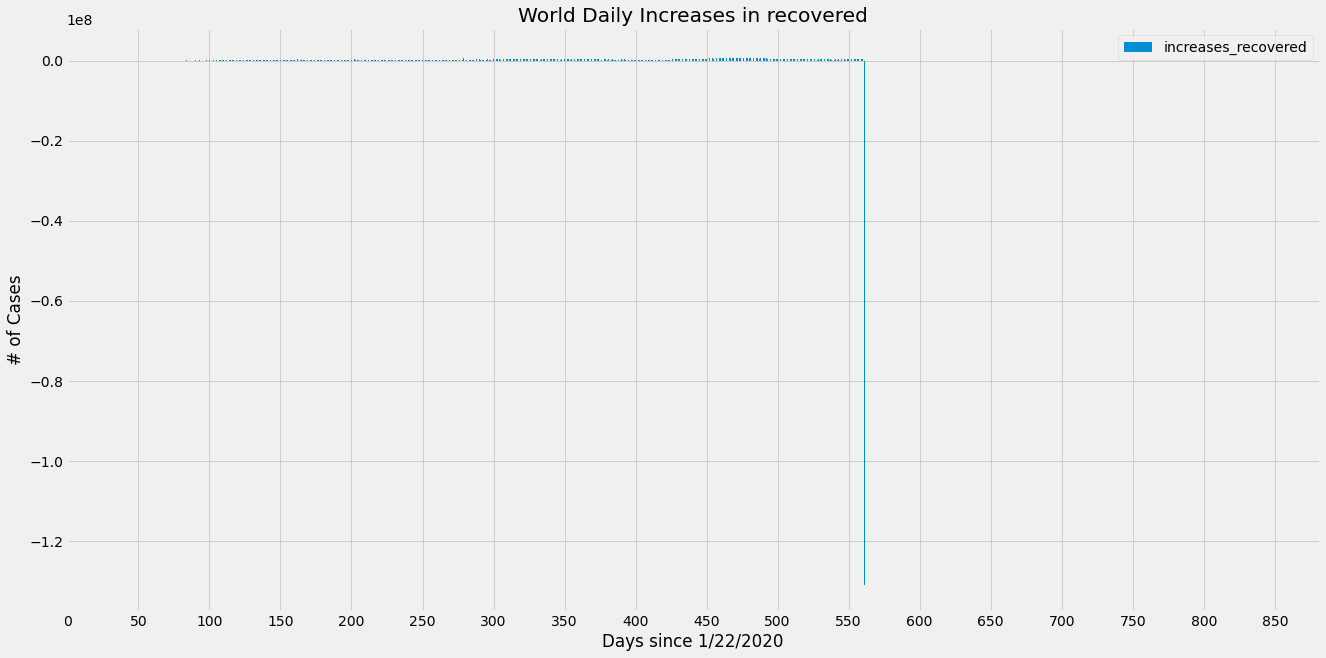

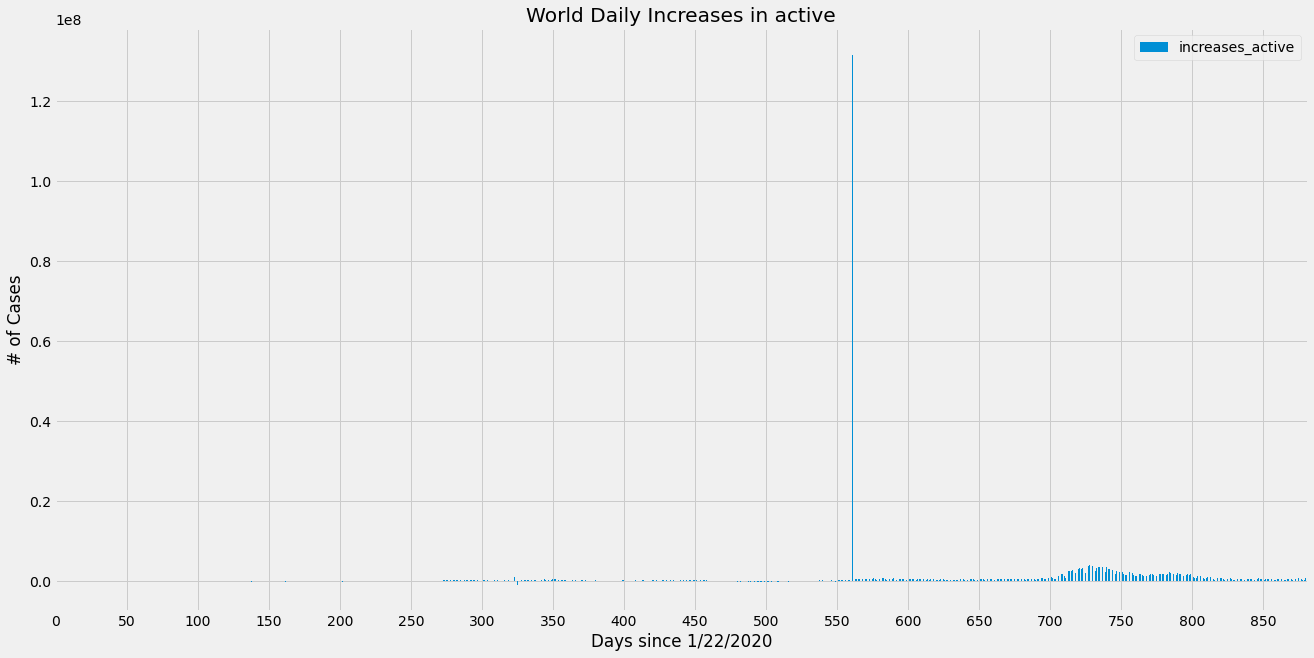

In [ ]:
# Vẽ biểu đồ đường thể hiện số lượng gia tăng hàng ngày về tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo đơn vị ngày
xtick = np.arange(increases_df.index[0], increases_df.index[-1], 50)
for i in increases_df.columns:
  ax = increases_df[i].plot( kind='bar', figsize=(20, 10), rot=0, label=i)
  ax.set_xlabel('Days since 1/22/2020')
  ax.set_ylabel('# of Cases')
  ax.set_xticks(xtick)
  ax.set_xticklabels(xtick)
  ax.set_title('World Daily Increases in '+str(i)[10:])
  ax.legend()
  plt.show()

## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [ ]:
#Phần trăm tỷ lệ tử vong toàn cầu theo thời gian.
percentage_deaths_df = (df.iloc[:,1]/df.iloc[:,0])*100
#Phần trăm tỷ lệ hồi phục toàn cầu theo thời gian.
percentage_recovered_df = (df.iloc[:,2]/df.iloc[:,0])*100

## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

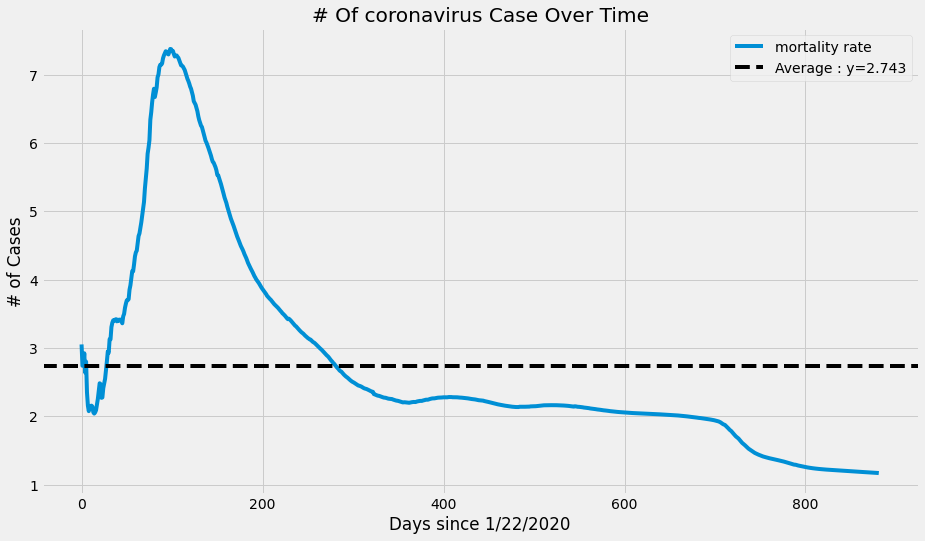

In [ ]:
#Vẽ biểu đồ thể hiện tỷ lệ tử vong theo thời gian (đơn vị ngày)
percentage_deaths_df.plot(kind='line', figsize=(14, 8))
plt.title('# Of coronavirus Case Over Time')
plt.ylabel('# of Cases')
plt.xlabel('Days since 1/22/2020')
plt.axhline(y=np.mean(percentage_deaths_df), color='k', linestyle='--')
plt.legend(['mortality rate', 'Average : y=' + str(round(np.mean(percentage_deaths_df),3))])

**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

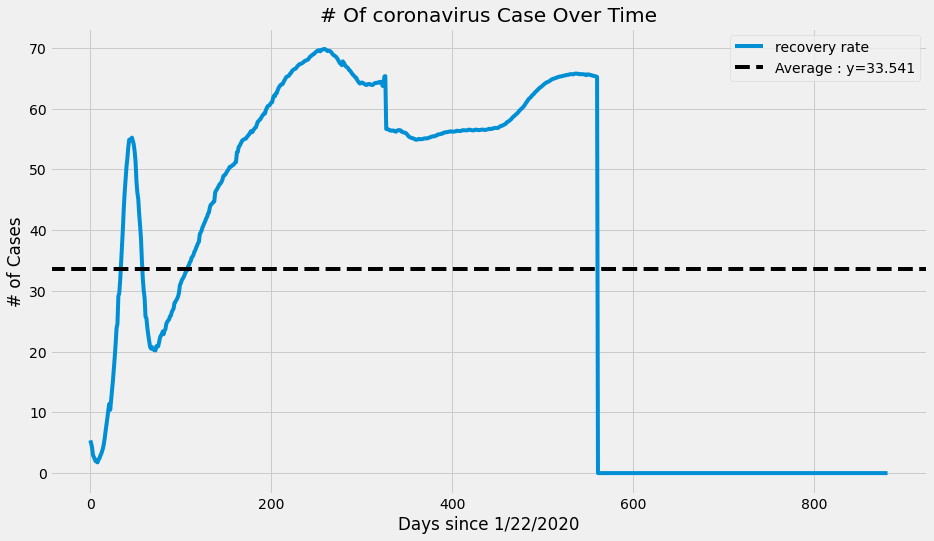

In [ ]:
#Vẽ biểu đồ thể hiện tỷ lệ hồi phục theo thời gian (đơn vị ngày)
percentage_recovered_df.plot(kind='line', figsize=(14, 8))
plt.title('# Of coronavirus Case Over Time')
plt.ylabel('# of Cases')
plt.xlabel('Days since 1/22/2020')
plt.axhline(y=np.mean(percentage_recovered_df), color='k', linestyle='--')
plt.legend(['recovery rate', 'Average : y=' + str(round(np.mean(percentage_recovered_df),3))])

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [ ]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, North', "Country/Region"] = 'North Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, North', "Country/Region"] = 'North Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, North", "Country/Region"] = "North Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [ ]:
#Thêm trường "continent" vào tập dữ liệu confirm_df, death_df 
continent = []
for i in range(len(confirmed_df)):
  continent.append(continents[country_to_continent_code(confirmed_df["Country/Region"][i])])
confirmed_df.insert(2, column='continent', value = continent)
deaths_df.insert(2, column='continent', value = continent)
#Thêm trường "continent" vào tập dữ liệu recorveries_df
continent_r = []
for i in range(len(recoveries_df)):
  continent_r.append(continents[country_to_continent_code(recoveries_df["Country/Region"][i])])
recoveries_df.insert(2, column='continent', value = continent_r)

## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [ ]:
# Tính tống số ca mắc
confirmed_country = confirmed_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
confirmed_country = confirmed_country.set_index(['Country/Region'])
total_confirmed_country = confirmed_country.iloc[:,-1]
total_confirmed_country = total_confirmed_country.rename('Confirmed')
total_confirmed_country = pd.DataFrame(total_confirmed_country)

# Tính tổng số ca tử vong
deaths_country = deaths_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
deaths_country = deaths_country.set_index(['Country/Region'])
total_deaths_country = deaths_country.iloc[:,-1]
total_deaths_country = total_deaths_country.rename('Deaths')
total_deaths_country = pd.DataFrame(total_deaths_country)

# Tính tổng số ca hồi phục
recoveries_country = recoveries_df.groupby(['Country/Region', 'continent'], as_index=False).sum()
recoveries_country = recoveries_country.set_index(['Country/Region'])
total_recoveries_country = recoveries_country.iloc[:,-1]
total_recoveries_country = total_recoveries_country.rename('Recoveries')
total_recoveries_country = pd.DataFrame(total_recoveries_country)

# Tính tổng số ca còn mắc Covid
total_active_country = total_confirmed_country.iloc[:,0] - total_deaths_country.iloc[:,0] - total_recoveries_country.iloc[:,0]
total_active_country = pd.DataFrame(total_active_country.rename('Active'))

# Tạo countries_df và thêm dữ liệu
countries_df = confirmed_country.iloc[:,0]
countries_df = pd.concat([countries_df, total_confirmed_country.iloc[:,0], total_deaths_country.iloc[:,0], total_recoveries_country.iloc[:,0], total_active_country.iloc[:,0]], axis = 1)

# Tính tỷ lệ tử vong và thêm vào countries_df
countries_df['Mortality Rate'] = np.round(countries_df.iloc[:,2] * 100 / countries_df.iloc[:,1],2)
countries_df

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,181808,7715,0,174093,4.24
Albania,Europe,277663,3497,0,274166,1.26
Algeria,Africa,265993,6875,0,259118,2.58
Andorra,Europe,43449,153,0,43296,0.35
Angola,Africa,99761,1900,0,97861,1.90
...,...,...,...,...,...,...
West Bank and Gaza,Others,658503,5660,0,652843,0.86
Winter Olympics 2022,Others,535,0,0,535,0.00
Yemen,Asia,11824,2149,0,9675,18.17


## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [ ]:
#Nhập code ở đây:
continents_df = countries_df.groupby(['continent']).sum()
continents_df['Mortality Rate']= np.round(100*continents_df['Deaths'] / continents_df['Confirmed'],2)
continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,11994311,254746,0,11739565,2.12
Asia,154956034,1417915,0,153538119,0.92
Australia,9360600,12625,0,9347975,0.13
Europe,201955719,1850602,0,200105117,0.92
North America,101883687,1455525,0,100428162,1.43
Others,1525680,28382,0,1497298,1.86
South America,58891721,1302243,0,57589478,2.21


## Mẫu biểu đồ đường
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp mắc Covid theo thời gian ở mỗi lục địa/quốc gia:

In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_5(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


## Bài toán 11
**11.1** 

    Áp dụng hàm visual_covid_case để hiển thị trực quan hóa của 7 lục địa trong 7 biểu đồ đường riêng biệt. Thứ tự của các trực quan hóa được sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận. 
    

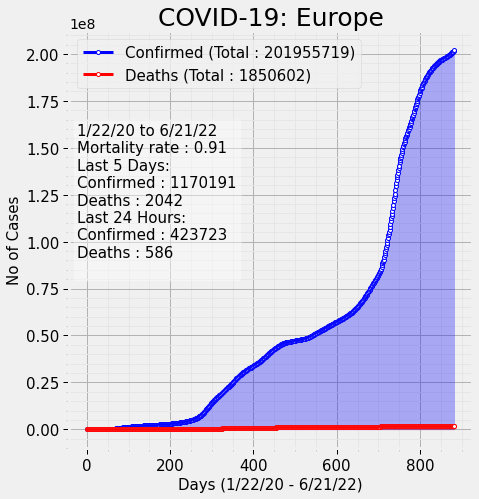

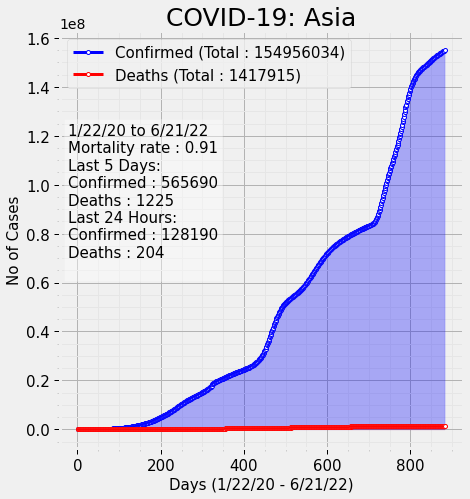

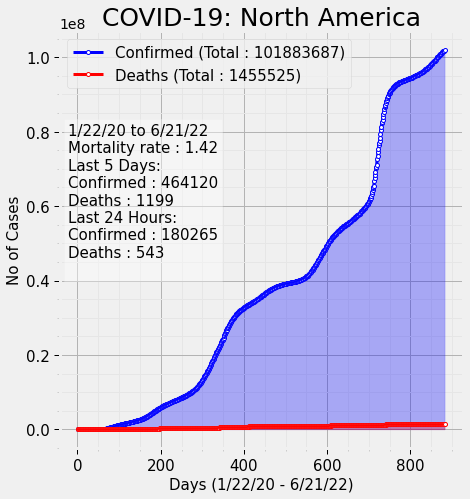

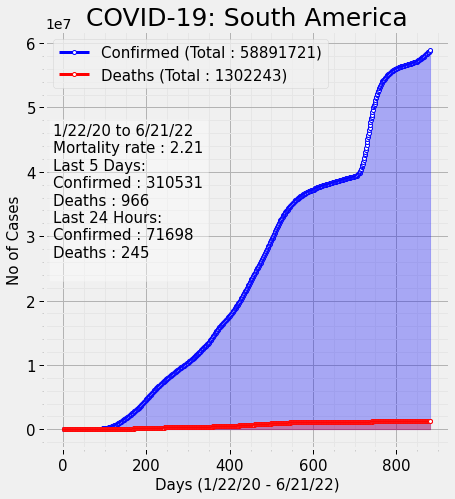

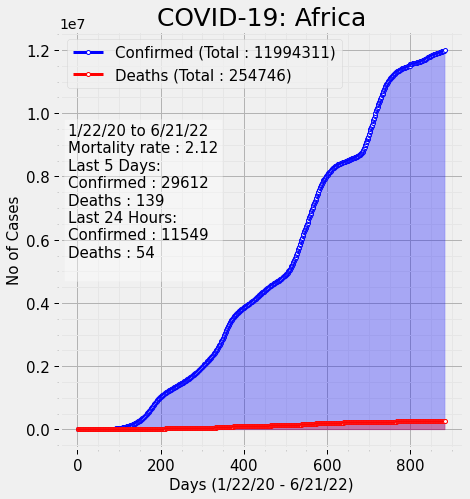

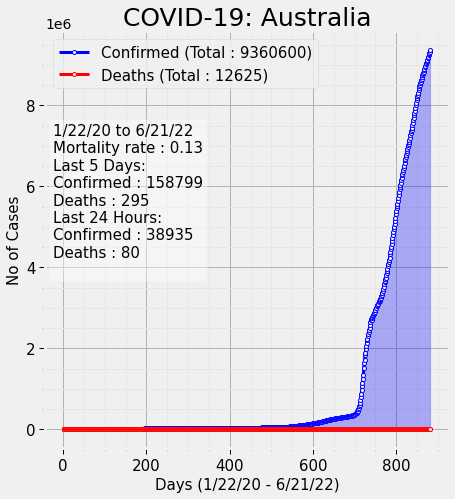

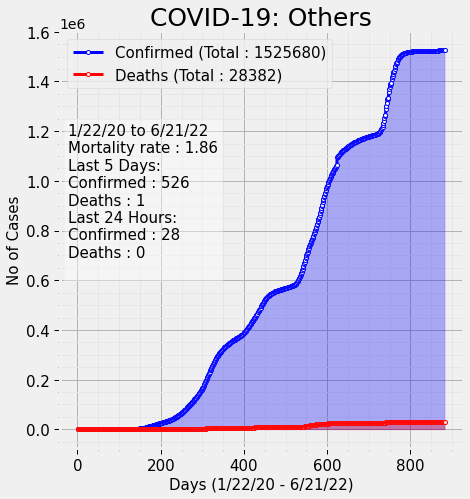

In [ ]:
#sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận
df_continents= confirmed_df.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
# Áp dụng hàm visual_covid_case để hiển thị trực quan hóa của 7 lục địa
for i,continent in enumerate(continents):
    visualize_covid_cases_5(confirmed_df, deaths_df, continent = continent)


**11.2**

    Sửa đổi hàm "plot_params" và "visual_covid_case" thành:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
    - Thêm "Recoveries line" vào biểu đồ chính.
    - Thêm số "Total Recoveries" vào bảng nhỏ
    - Thêm "Recoveries" được điền trong 7 ngày và 24 giờ qua vào menu thông tin.

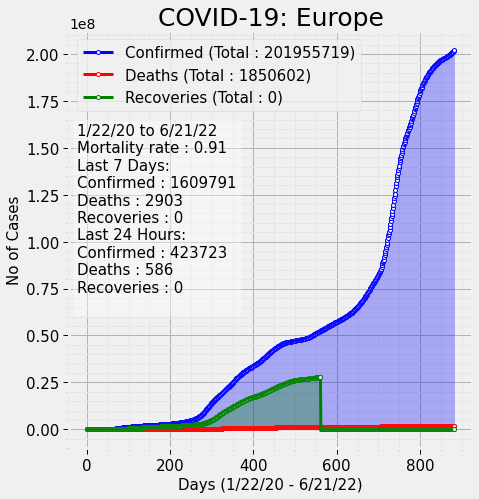

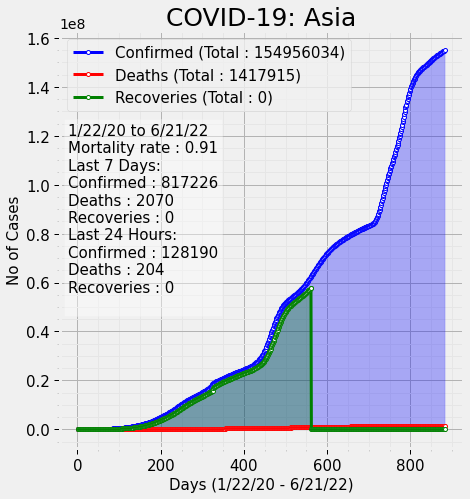

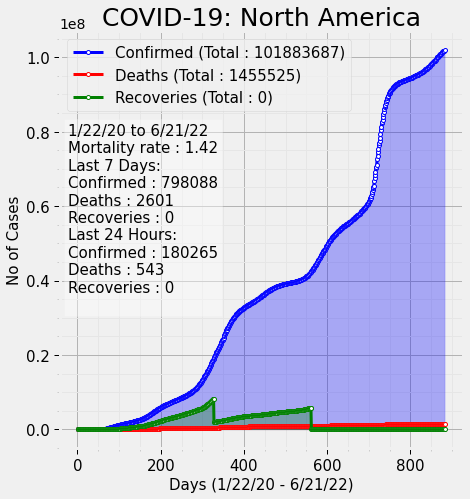

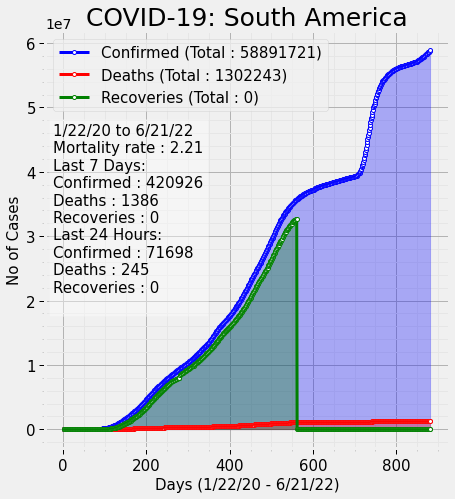

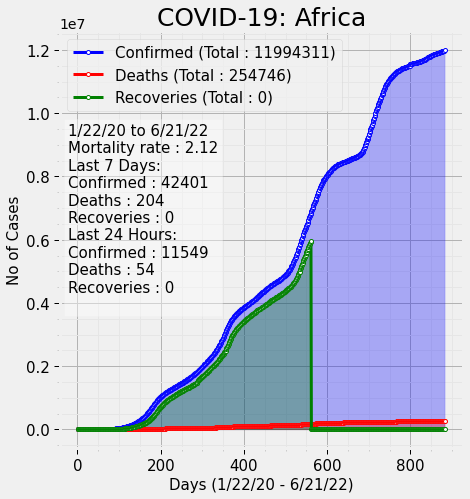

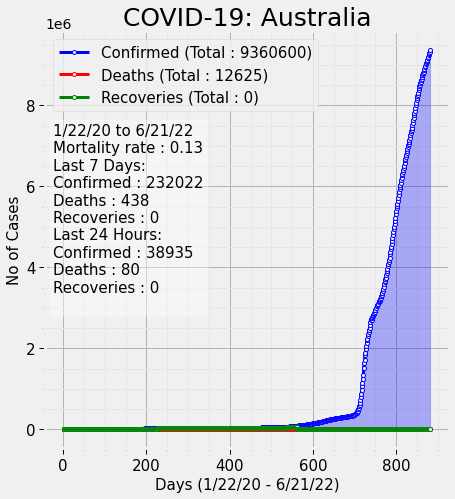

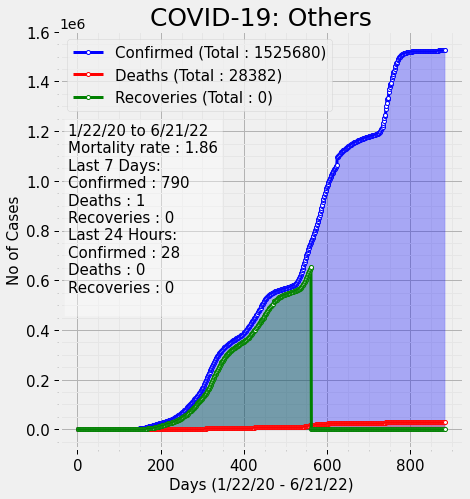

In [ ]:
# Áp dụng hàm visual_covid_case_7 để hiển thị trực quan hóa của 7 lục địa
for i,continent in enumerate(continents):
    visualize_covid_cases_7(confirmed_df, deaths_df, recoveries_df, continent = continent)

## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

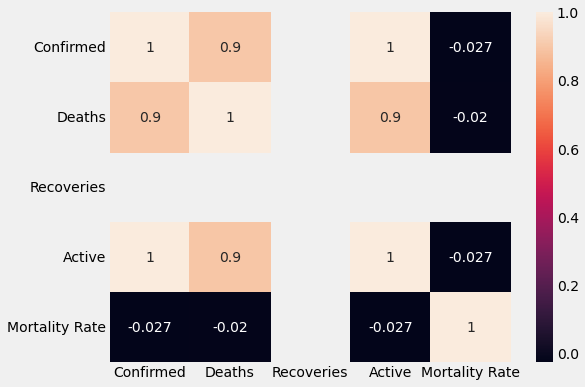

In [ ]:
#Trực quan hóa ma trận hiệp phương sai cho continents_df.
f, ax = plt.subplots(figsize=(8, 6))
corr = countries_df.corr()
sns.heatmap(corr, annot=True)

## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

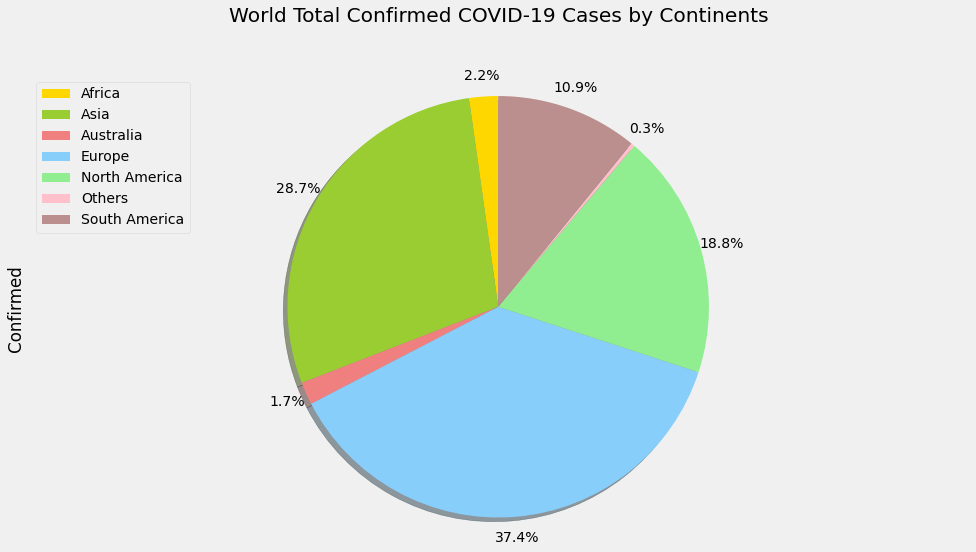

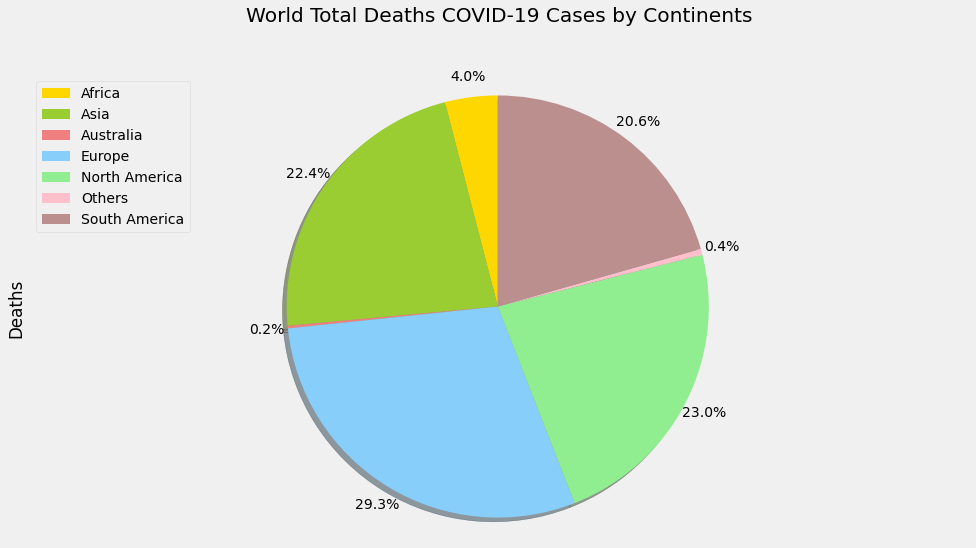

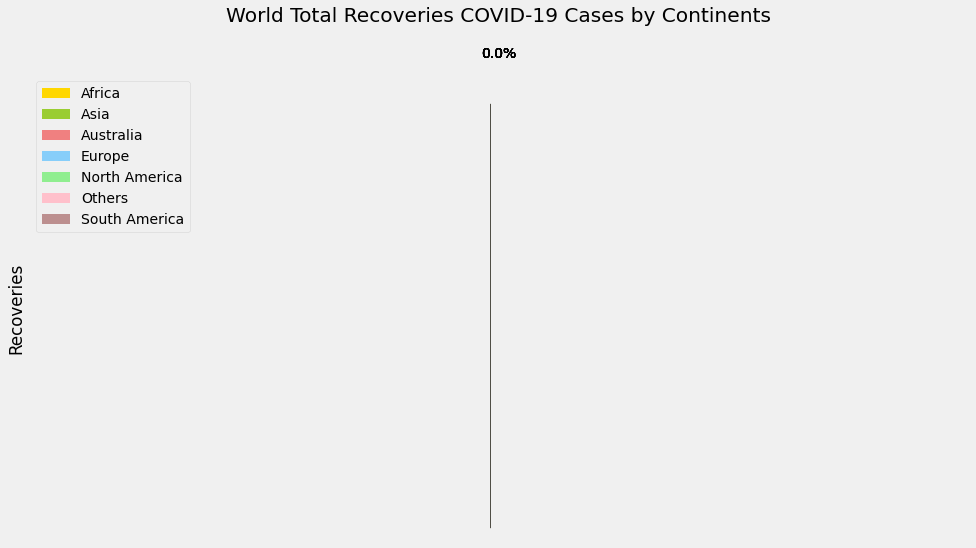

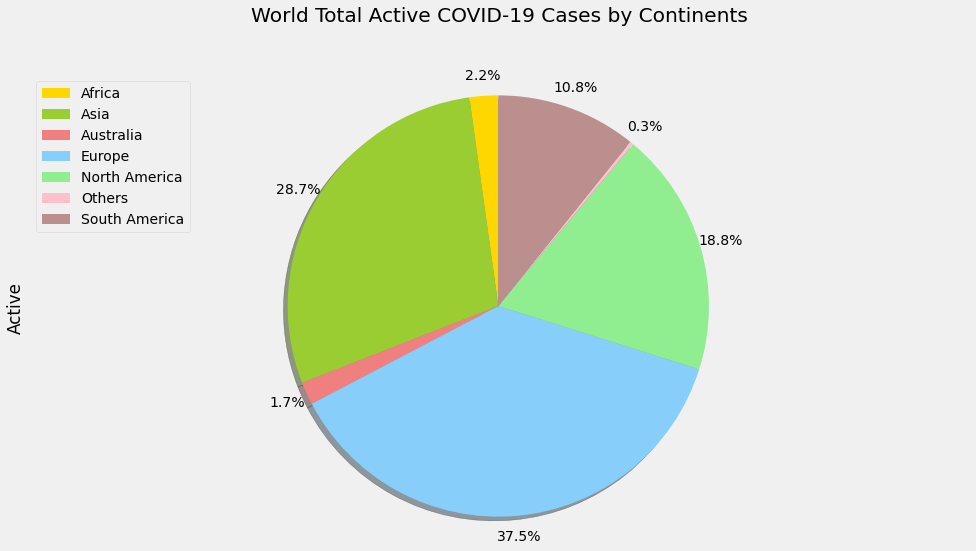

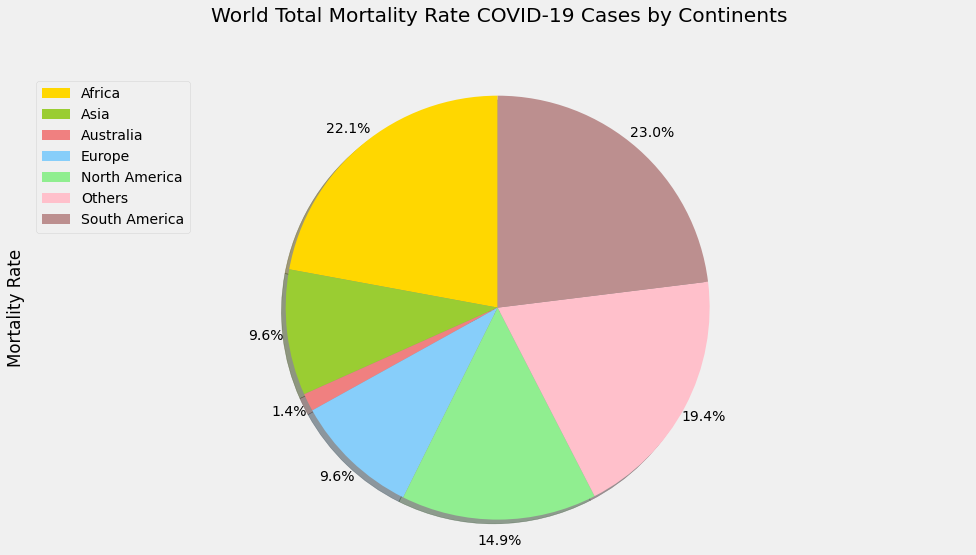

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'rosybrown']
for i in range(len(continents_df.columns)):
  continents_df[continents_df.columns[i]].plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list  # add custom colors
                            )
# scale the title up by 10% to match pctdistance
  plt.title('World Total '+str(continents_df.columns[i])+' COVID-19 Cases by Continents', y=1.1) 
  plt.axis('equal') 
# add legend
  plt.legend(labels=continents_df.index, loc='upper left') 
  plt.show()

# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.

In [ ]:
# Group by Country và tính trung bình tọa độ, thêm tọa độ vào countries_df
location_mean_df = confirmed_df.groupby(['Country/Region']).mean()
countries_df['Lat']=location_mean_df['Lat']
countries_df['Long']=location_mean_df['Long']
countries_df = countries_df.reset_index()
# Vẽ bản đồ folium để hiển thị các thông số của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.
world_map = folium.Map(location=[0,0], tiles="cartodbpositron", zoom_start=2,max_zoom=10,min_zoom=2)
for i in range(0,len(countries_df)):
    folium.Circle(
        location=[countries_df.iloc[i]['Lat'], countries_df.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+countries_df.iloc[i][0]+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(countries_df.iloc[i][1]))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                    "<li>Confirmed: "+str(countries_df.iloc[i,2])+"</li>"+
                    "<li>Deaths:   "+str(countries_df.iloc[i,3])+"</li>"+
                    "<li>Recovered:   "+str(countries_df.iloc[i,4])+"</li>"+
                    "<li>Active:   "+str(countries_df.iloc[i,5])+"</li>"+
                    "<li>Mortality Rate:   "+str(countries_df.iloc[i,6])+"</li>"+
                    "</ul>",
        radius=float(countries_df.iloc[i][2])/50,
        color='#bb66ff',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [ ]:
#data master
countries_map_df = countries_df

#dict all country iso code 
countries_all_dict_iso_code = cm.map_countries()

#list store code for countries_map_df
countries_iso_code = []

#convert name countries to iso code
for i in range(countries_map_df.shape[0]):
    key = countries_map_df.iloc[i,0]
    try:
        if key == 'Burma':
            countries_iso_code.append("BUR")
        elif key == 'Diamond Princess':
            countries_iso_code.append("NAN")
        elif key == 'Holy See':
            countries_iso_code.append("VAT")
        elif key == 'Kosovo':
            countries_iso_code.append("UNK")
        elif key == 'MS Zaandam':
            countries_iso_code.append("NAN")
        elif key == 'Timor-Leste':
            countries_iso_code.append("TLS")
        elif key == 'West Bank and Gaza':
            countries_iso_code.append("NAN")
        elif key == 'USA':
            countries_iso_code.append("USA")
        else:
            countries_iso_code.append(countries_all_dict_iso_code[key]["alpha_3"])
    except:
        print("errot: " + key)

#convert list countries_iso_code to dataframe 
countries_iso_code_df = pd.DataFrame(countries_iso_code, columns =['iso_alpha'])

#merge countries_iso_code_df to countries_map_df
countries_map_df = pd.concat([countries_map_df.iloc[:,:], countries_iso_code_df.iloc[:,0]],axis = 1)

#calculate the log 10 of the active column
color_df = np.log10(countries_map_df['Active'])

#rename log 10 of the active column to color name
color_df = color_df.to_frame('color')

#merge color_df to  countries_map_df
countries_map_df = pd.concat([countries_map_df, color_df], axis = 1)

# draw map
fig = px.choropleth(countries_map_df, locations="iso_alpha", color="color",hover_data = ["Active","Country/Region"], labels={'color':'Active Cases(log scale)'},hover_name="Country/Region", title="Active Cases Heat Map (Log Scale)",color_continuous_scale='Spectral')
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

errot: Summer Olympics 2020
errot: Winter Olympics 2022


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log10



## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [ ]:
countries_top10 = countries_df.sort_values('Confirmed',ascending=False).head(10)
countries_top10

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
184,USA,North America,86452232,1013975,0,85438257,1.17,40.000000,-100.000000
79,India,Asia,43331645,524903,0,42806742,1.21,20.593684,78.962880
24,Brazil,South America,31818827,669390,0,31149437,2.10,-14.235000,-51.925300
62,France,Europe,30476915,150201,0,30326714,0.49,6.425300,-9.839634
66,Germany,Europe,27454225,140462,0,27313763,0.51,51.165691,10.451526
188,United Kingdom,Europe,22717987,180376,0,22537611,0.79,25.767514,-35.857561
164,South Korea,Asia,18298341,24474,0,18273867,0.13,35.907757,127.766922
145,Russia,Europe,18134735,372880,0,17761855,2.06,61.524010,105.318756
85,Italy,Europe,17959329,167842,0,17791487,0.93,41.871940,12.567380
183,Turkey,Asia,15085742,98996,0,14986746,0.66,38.963700,35.243300


## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

In [ ]:
px.histogram(countries_top10.reset_index(), x="Country/Region", hover_data = ["variable"] , y = ["Deaths", "Recoveries", "Active"], title = "Top 10 Countries (Confirmed Cased)", labels={"variable": ""})

# 8. Phân tích nâng cao
 

## Bài toán 18
    Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Bạn hãy trả lời ở đây:


<b>Trả lời :</b> Đại dịch COVID 2019 trên thế giới vẫn chưa đặt đến đỉnh điểm bởi vì biểu đồ thể hiện số trường hợp nhiễm bệnh trên toàn thế giới vẫn còn xu hướng tăng.

## Bài toán 19
Dựa trên trực quan hóa dữ liệu của châu lục:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
    
    19.3 Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?

(Lưu ý: Tỷ lệ lan truyền COVID 2019 = Số lượng các ca mới được xác nhận trong 10 ngày qua / số ca mắc trước đó).
Bạn hãy trả lời ở đây:

**Trả lời:** 
19.1 South America có tỷ lệ tử vong cao nhất với Mortality Rate=2,22% trên tổng số các châu lục.

In [ ]:
# Số ca mắc trong 10 ngày qua
after_10day = pd.DataFrame(confirmed_df.groupby(['continent']).sum().iloc[:,-1] - confirmed_df.groupby(['continent']).sum().iloc[:,-11])
# Số ca mắc trước đó
before_10day = pd.DataFrame(confirmed_df.groupby(['continent']).sum().iloc[:,-11])
# Tính tỷ lệ lây lan
continents_spread_rate = pd.DataFrame(np.round(100 * after_10day.iloc[:,0] / before_10day.iloc[:,0],2), columns = ['spread_rate'])
continents_spread_rate.sort_values(by='spread_rate', ascending=False)

,spread_rate
continent,
Australia,3.72
North America,1.11
South America,1.10
Europe,0.86
Asia,0.76
Africa,0.41
Others,0.02


**Trả lời:** 19.2 Australia có tỷ lệ lây lan Covid 19 cao nhất với tỷ lệ 3,72%

In [ ]:
#tỷ lệ hồi phục
continents_df['recoveries_rate'] = np.round(100 * continents_df.iloc[:,2] / continents_df.iloc[:,0],2)
continents_df.sort_values(by=['recoveries_rate'], ascending=False)

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,recoveries_rate
continent,,,,,,
Africa,11979225,254659,0,11724566,2.13,0.0
Asia,154719863,1417456,0,153302407,0.92,0.0
Australia,9286399,12474,0,9273925,0.13,0.0
Europe,201140683,1849332,0,199291351,0.92,0.0
North America,101644845,1454862,0,100189983,1.43,0.0
Others,1525235,28382,0,1496853,1.86,0.0
South America,58659601,1301474,0,57358127,2.22,0.0


**Trả lời:** 19.3 Không đủ dữ liệu để tính tỷ lệ hồi phục đến thời điểm hiện tại

## Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
     
    20.3 Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?
Bạn hãy trả lời ở đây:
<p><b>Trả lời:</b></p>

In [ ]:
countries_df.sort_values(by=['Mortality Rate'], ascending=False)

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
129,North Korea,Asia,1,6,0,-5,600.00,40.339900,127.510100
104,MS Zaandam,Others,9,2,0,7,22.22,0.000000,0.000000
196,Yemen,Asia,11824,2149,0,9675,18.17,15.552727,48.516388
168,Sudan,Africa,62533,4950,0,57583,7.92,12.862800,30.217600
138,Peru,South America,3600993,213395,0,3387598,5.93,-9.190000,-75.015200
...,...,...,...,...,...,...,...,...,...
5,Antarctica,Others,11,0,0,11,0.00,-71.949900,23.347000
115,Micronesia,Australia,38,0,0,38,0.00,7.425600,150.550800
195,Winter Olympics 2022,Others,535,0,0,535,0.00,39.904200,116.407400
75,Holy See,Others,29,0,0,29,0.00,41.902900,12.453400


**Trả lời**: 20.1 Theo số liệu ghi nhận North Korea có 1 ca mắc Covid nhưng có 6 ca tử vong vì Covid, tỷ lệ tỷ vong là 600% ==> Vô lý

MS Zaandam có tỷ lệ tử vong Mortality Rate = 22.22% là quốc gia có tỷ lệ tử vong cao nhất theo tập dữ liệu quốc gia.

In [ ]:
# Số ca mắc trong 10 ngày qua
after_10day = pd.DataFrame(confirmed_df.groupby(['Country/Region']).sum().iloc[:,-1] - confirmed_df.groupby(['Country/Region']).sum().iloc[:,-11])
# Số ca mắc trước đó
before_10day = pd.DataFrame(confirmed_df.groupby(['Country/Region']).sum().iloc[:,-11])
# Tính tỷ lệ lây lan
country_spread_rate = pd.DataFrame(np.round(100 * after_10day.iloc[:,0] / before_10day.iloc[:,0],2), columns = ['spread_rate'])
country_spread_rate.sort_values(by='spread_rate', ascending=False)

,spread_rate
Country/Region,
Taiwan*,28.20
Micronesia,16.67
Vanuatu,13.23
New Zealand,4.87
Samoa,4.54
...,...
Kyrgyzstan,0.00
Summer Olympics 2020,0.00
Egypt,0.00


**Trả lời**: 20.2 Taiwan* là quốc gia có tỷ lệ lây lan covid 19 cao nhất với spread_rate = 28.2%

In [ ]:
#tỷ lệ hồi phục
countries_df['recoveries_rate'] = np.round(100 * countries_df.iloc[:,4] / countries_df.iloc[:,2],2)
countries_df.sort_values(by=['recoveries_rate'], ascending=False)

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long,recoveries_rate
0,Afghanistan,Asia,181666,7713,0,173953,4.25,33.939110,67.709953,0.0
125,New Zealand,Australia,1283295,1338,0,1281957,0.10,-31.068650,7.554150,0.0
127,Niger,Africa,9031,310,0,8721,3.43,17.607789,8.081666,0.0
128,Nigeria,Africa,256573,3144,0,253429,1.23,9.082000,8.675300,0.0
129,North Korea,Asia,1,6,0,-5,600.00,40.339900,127.510100,0.0
...,...,...,...,...,...,...,...,...,...,...
69,Grenada,North America,18115,231,0,17884,1.28,12.116500,-61.679000,0.0
70,Guatemala,North America,880467,18401,0,862066,2.09,15.783500,-90.230800,0.0
71,Guinea,Africa,36817,442,0,36375,1.20,9.945600,-9.696600,0.0
72,Guinea-Bissau,Africa,8307,171,0,8136,2.06,11.803700,-15.180400,0.0


**Trả lời**: 20.3 Không đủ dữ liệu để tính tỷ lệ hồi phục đến thời điểm hiện tại